<a href="https://colab.research.google.com/github/prasanthjose/AI/blob/master/S2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.datasets import mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


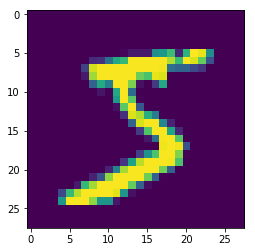

In [9]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# Doing convolution with 32 3x3 kernels. activation function is relu. In the fist layer the input size should be mentioned which is a 28X28 picture. I don't know what 1 means.
# RF 3X3
model.add(Convolution2D(64, 3, 3, activation='relu'))
#RF 5X5
model.add(Convolution2D(128, 3, 3, activation='relu'))
#RF 7X7

model.add(MaxPooling2D(pool_size=(2, 2)))
#Doing max pooling to reduce the image size to half (11X11)
#RF 14X14

model.add(Convolution2D(256, 3, 3, activation='relu'))
#RF 16X16
model.add(Convolution2D(512, 3, 3, activation='relu'))
#RF 18X18
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#RF 20X20
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#RF 22X22
model.add(Convolution2D(10, 3, 3, activation='relu'))


model.add(Flatten())
#Flatten the arrays
model.add(Activation('softmax'))
# The output function of the final layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipyk

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 12465s 208ms/step - loss: 14.4623 - acc: 0.1022
Epoch 2/10
60000/60000 [==============================] - 12576s 210ms/step - loss: 14.4711 - acc: 0.1022
Epoch 3/10
22880/60000 [==========>...................] - ETA: 2:08:54 - loss: 14.4549 - acc: 0.1032

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [2]:
print(score)

NameError: ignored

In [3]:
y_pred = model.predict(X_test)

NameError: ignored

In [4]:
print(y_pred[:9])
print(y_test[:9])

NameError: ignored

In [0]:
#Learning takes too much time. 3 epochs took a day. The accuracy is not improving. The number of layers needs to be reduced.